# Learning Box Embeddings to represent a tree

We need to implement a box embedding model (in pytorch and tensorflow) that learns to embed a graph in 50 dimensional box space. This involves the following steps: 
1. Implementing the center-delta ($c-\delta$) parameterization where $\alpha_m=c - \delta/2,~ \alpha_M = c + \delta/2$ are the min and max coordinates of a box (see reference for details). Note that $\delta >= 0$, how would you ensure this?

2. Implementing box intersection operation (see equation 1 in reference).

3. Implementing softbox volume and use it compute conditional probabilities of edges (see equation 2 \& 3 in reference)

4. Implementing the main loss function (the first term in equation 4, you do not need to implement the second term, that is the volume regularization).

5. Implementing a training loop

  1. Implement a strategy to get negatives (edges that are not present in the graph as negatives). You can do true negative sampling by looking a the ground truth edges or perform random negative sampling. (Note: That the ground truth contains edges from the transitive closure as they are meant to be the part of the ground truth.)
  
  2. Compute the loss using the positive and negatives in a mini-batch according to equation 4. 
  
  3. Take a gradient step using the loss.
 
6. For the final evaluation, we would like to create a "test set" that contains all the edges in the ground truth as the postives examples and all edges that are not present in the ground truth as the negative examples. Using this test set first find an optimal threshold for the score/conditional probability (eq. 2) for the presence of an edge. Then use use this threshold to get the F1 score on the test set itself. (Note: We are aware that data being shared between the test set and the train set. Hence, if implemented correctly, you should get a nearly perfect F1 score. You can use this fact to debug you implementation).


## Main Reference
Section 3.1 to 3.4 in [Representing Joint Hierarchies with Box Embeddings](https://openreview.net/pdf?id=J246NSqR_l)

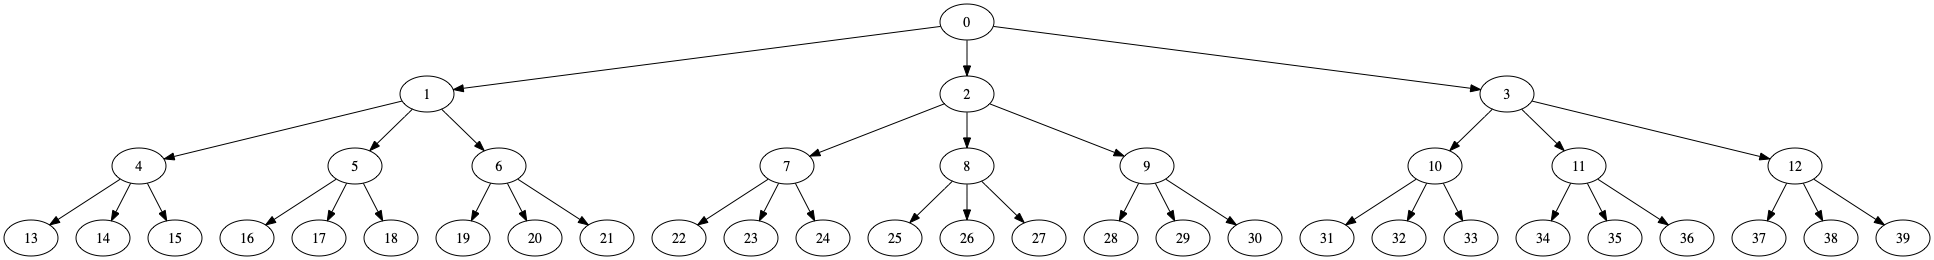

In [15]:
# The transitive reduction of the tree we are trying to represent
from IPython.display import Image
Image(filename='.data/toy_tree_balanced_rank_based/tree.png') 


In [12]:
# Reading the data
from pathlib import Path
ground_truth_file = Path('./.data/toy_tree_balanced_rank_based/gtruth2id.txt')
training_edges_file = Path('./.data/toy_tree_balanced_rank_based/train2id.txt')
def read_edges(file: Path): 
    with open(file, 'r') as f:
        lines = f.readlines()
        num_edges = int(lines[0])
        assert len(lines) == num_edges+1
        edges = []
        for line in lines[1:]:
            parent, child, relation = line.strip().split('\t')
            edges.append((int(parent), int(child)))
        return edges


In [13]:
ground_truth_edges = read_edges(ground_truth_file)
train_edges_positive = read_edges(training_edges_file)